# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


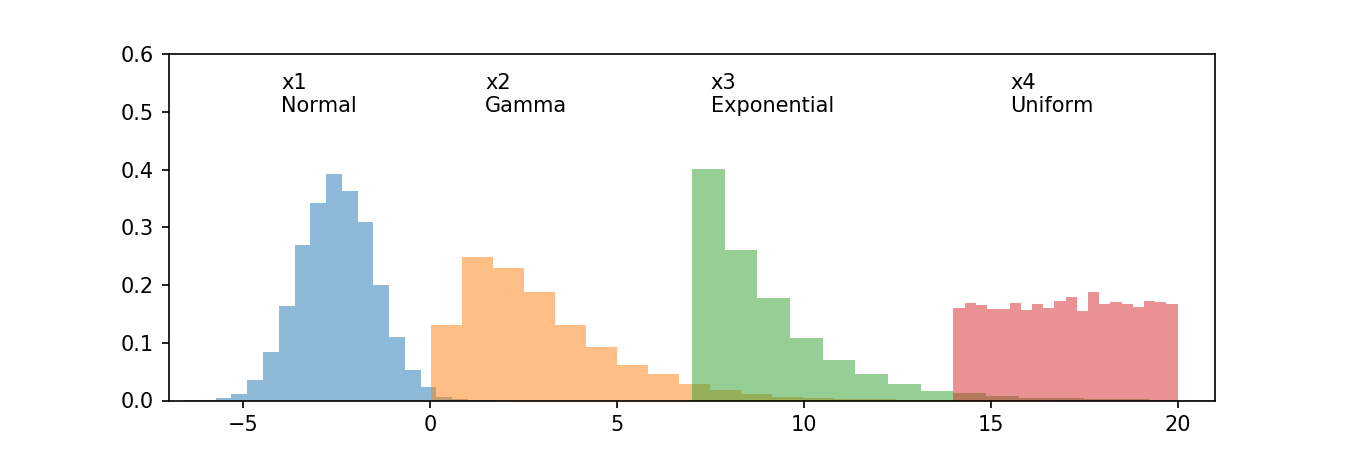

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


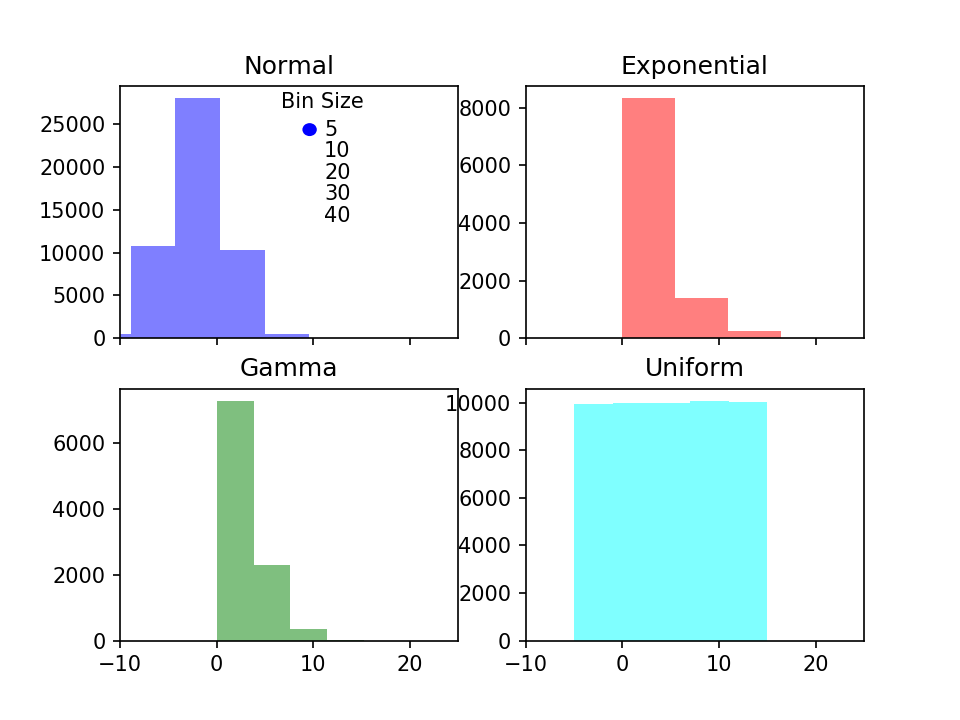

0

In [2]:
from matplotlib.widgets import RadioButtons
import numpy as np
import matplotlib.pyplot as plt

# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.0, 3, 50000) #, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(3, 10000)
x4 = np.random.uniform(-5,15, 50000)


# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    if n==0:
        myColor = 'blue'
        myTitle = 'Normal'
        data = 'x1'
    elif n==1:
        myColor = 'red'
        myTitle = 'Exponential'
        data = 'x3'
    elif n==2:
        myColor = 'green'
        myTitle = 'Gamma'

        data = 'x2'
    else:
        myColor = 'cyan'
        myTitle = 'Uniform'
 
        data = 'x4'
        
    # axs[n].hist(eval('x'+str(n+1)), bins=20, alpha=0.5, color=myColor) 
    axs[n].hist(eval(data), bins=5, alpha=0.5, color=myColor) 
    
    plt.xlim(-10, 25)

axs[0].set_title('{}'.format('Normal'))
axs[1].set_title('{}'.format('Exponential'))
axs[2].set_title('{}'.format('Gamma'))
axs[3].set_title('{}'.format('Uniform'))
    

# define radio button and text
rax = plt.axes([0.3, .67, .15, .18], frameon=False)
radio = RadioButtons(rax, (5, 10, 20, 30, 40))
plt.text(-.05, 1.0, 'Bin Size', fontsize=10)

# update function
def update(label):
    ax1.cla()
    axs[0].hist(x1, bins=int(radio.value_selected), alpha=0.5, color='blue')
    axs[0].set_title('{}'.format('Normal')) 
    
    ax3.cla()
    axs[2].hist(x2, bins=int(radio.value_selected), alpha=0.5, color='green') 
    axs[2].set_title('{}'.format('Gamma'))
    
    ax2.cla()
    axs[1].hist(x3, bins=int(radio.value_selected), alpha=0.5, color='red') 
    axs[1].set_title('{}'.format('Exponential'))
    
    ax4.cla()
    axs[3].hist(x4, bins=int(radio.value_selected), alpha=0.5, color='cyan') 
    axs[3].set_title('{}'.format('Uniform'))
    
    
radio.on_clicked(update)